In [2]:
!pip install missingno

import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #https://towardsdatascience.com/a-major-seaborn-plotting-tip-i-wish-i-had-learned-earlier-d8209ad0a20e

In [9]:
zf = zipfile.ZipFile('Data/diamonds.zip') 
df = pd.read_csv(zf.open('diamonds.csv'),index_col=0)
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='category').columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')
Index([], dtype='object')


In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

carat : [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 

In [15]:
for col in df.columns:
    df[col].replace({'?': np.nan},inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


C:\Users\vsr3204\AppData\Local\Temp\ipykernel_14612\654314136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'?': np.nan},inplace=True)


In [25]:
df[0:5] #playing with pandas methods

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
df.loc[:5,["color","cut"]] #playing with pandas methods

,color,cut
1,E,Ideal
2,E,Premium
3,E,Good
4,I,Premium
5,J,Good


In [28]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [29]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [31]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [34]:
df[["cut","clarity"]].value_counts()

cut        clarity
Ideal      VS2        5071
           SI1        4282
           VS1        3589
Premium    SI1        3575
           VS2        3357
Very Good  SI1        3240
Premium    SI2        2949
Ideal      VVS2       2606
           SI2        2598
Very Good  VS2        2591
           SI2        2100
Ideal      VVS1       2047
Premium    VS1        1989
Very Good  VS1        1775
Good       SI1        1560
Very Good  VVS2       1235
Ideal      IF         1212
Good       SI2        1081
           VS2         978
Premium    VVS2        870
Very Good  VVS1        789
Good       VS1         648
Premium    VVS1        616
Fair       SI2         466
           SI1         408
Good       VVS2        286
Very Good  IF          268
Fair       VS2         261
Premium    IF          230
Fair       I1          210
Premium    I1          205
Good       VVS1        186
Fair       VS1         170
Ideal      I1          146
Good       I1           96
Very Good  I1           84
Good     

In [56]:
df[df['x']*df['y']*df['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [117]:
df[ind] = df['x'] == 0 or df['y'] == 0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Axes: >

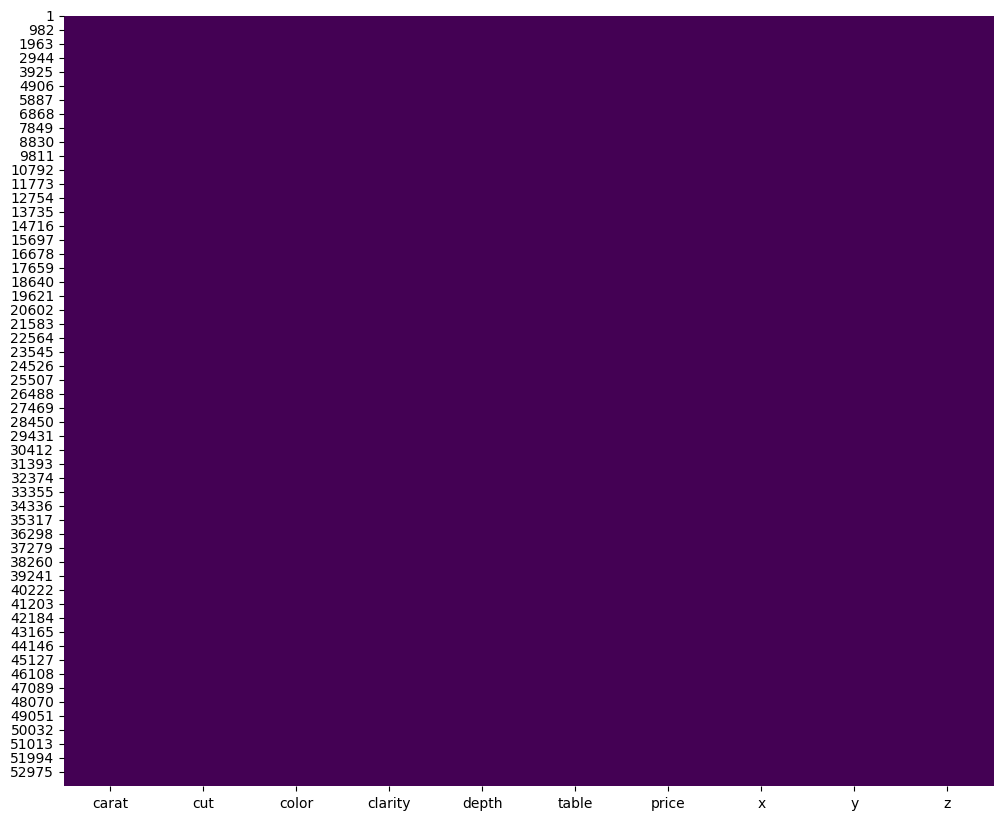

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [64]:
import missingno as msno

<Axes: >

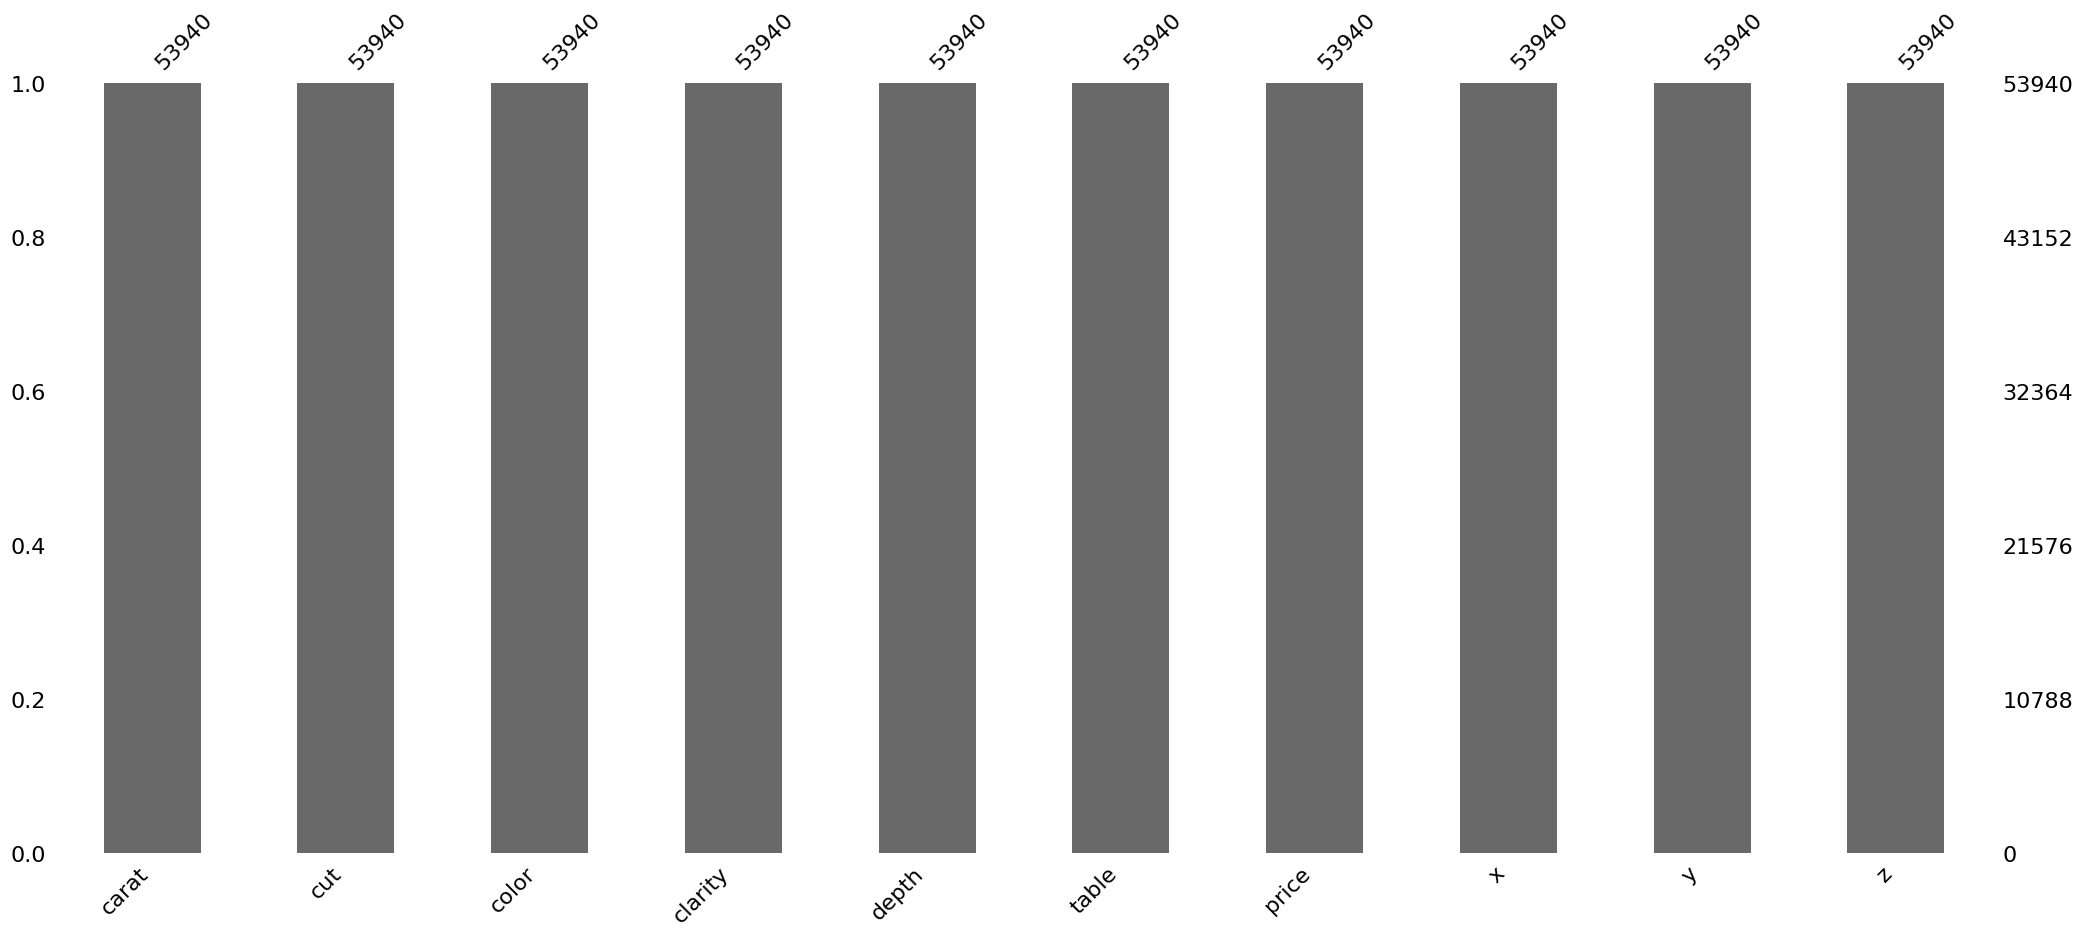

In [65]:
msno.bar(df)

<Axes: >

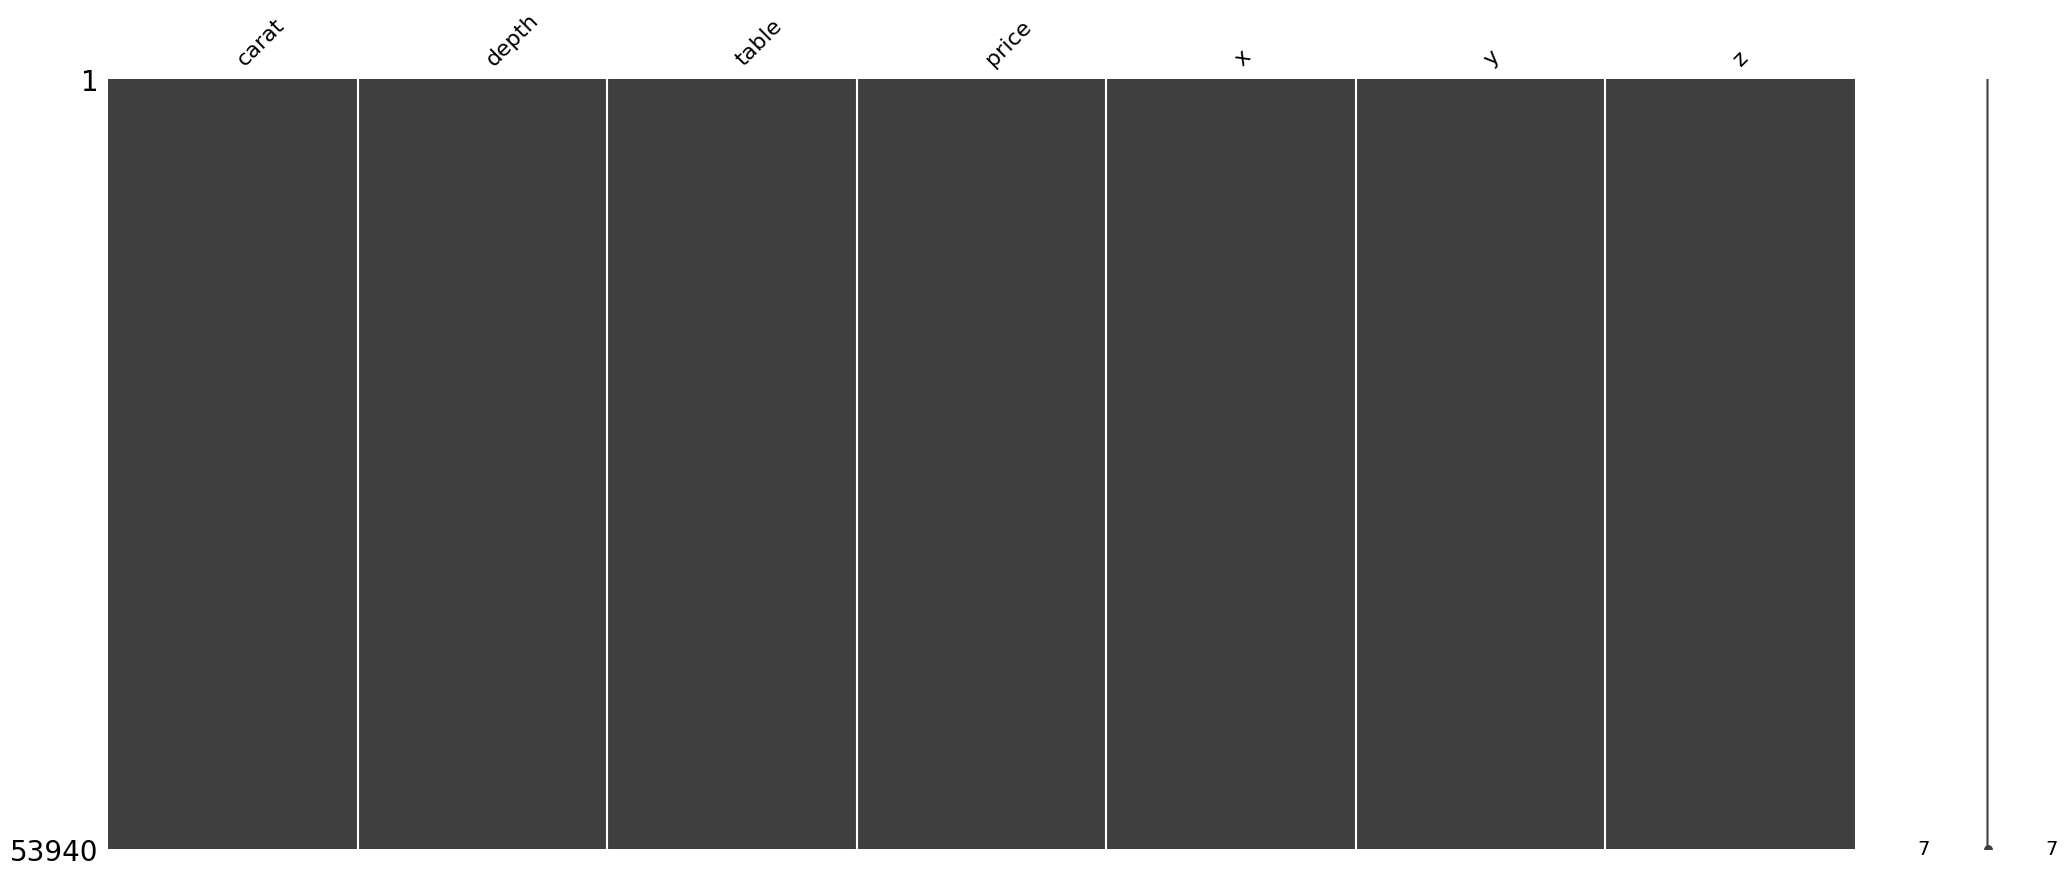

In [73]:
msno.matrix(df.select_dtypes(include='number'))

C:\My Folder\Masterclass\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\My Folder\Masterclass\.venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

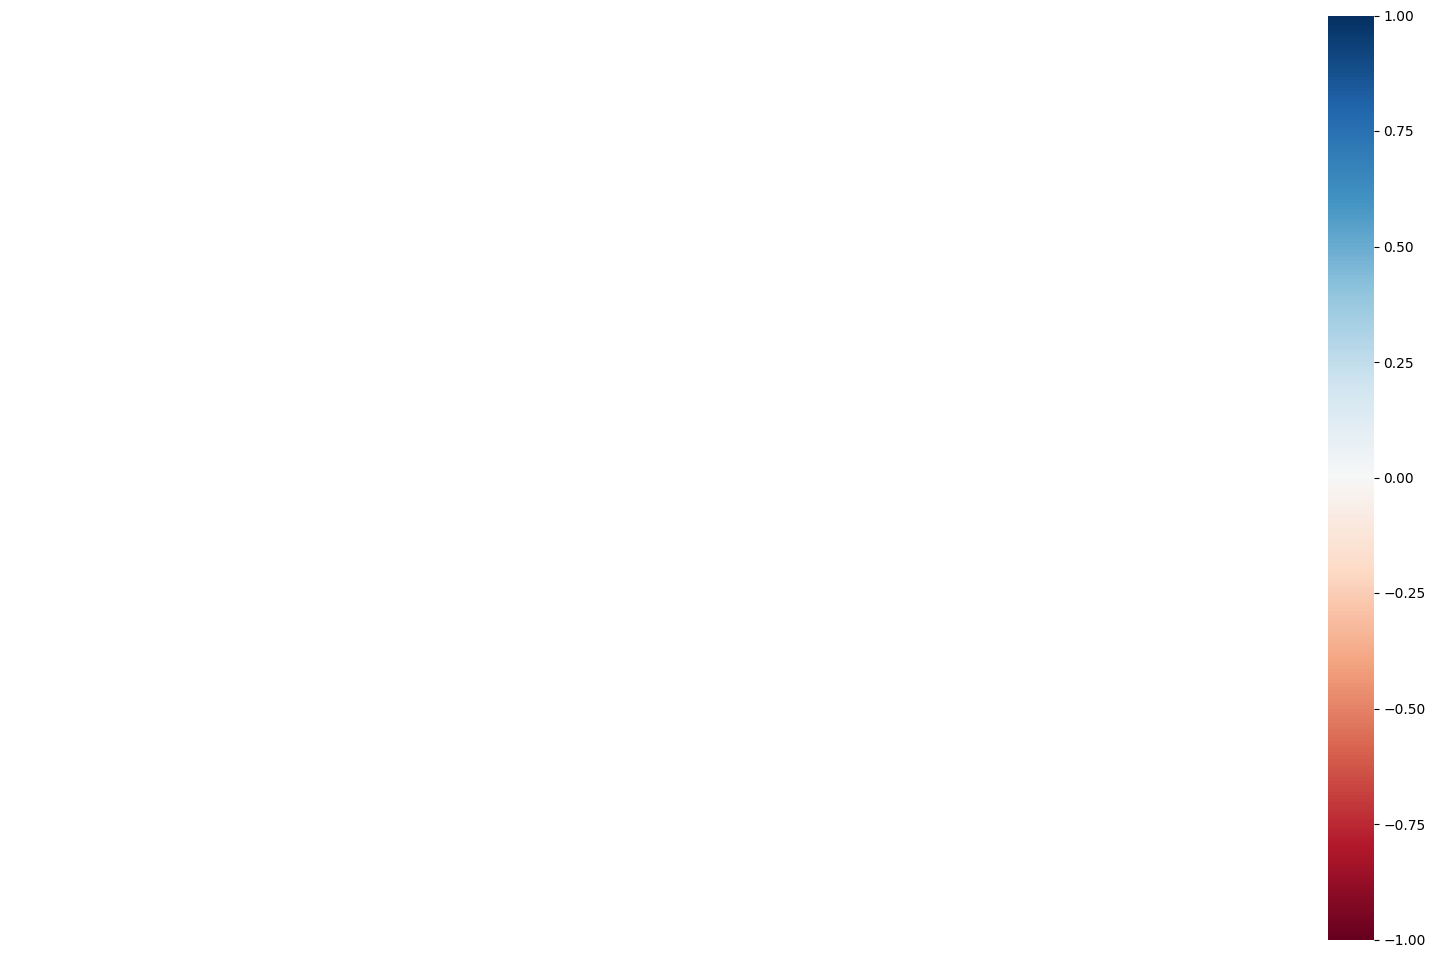

In [74]:
msno.heatmap(df.select_dtypes(include='number'))

C:\My Folder\Masterclass\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

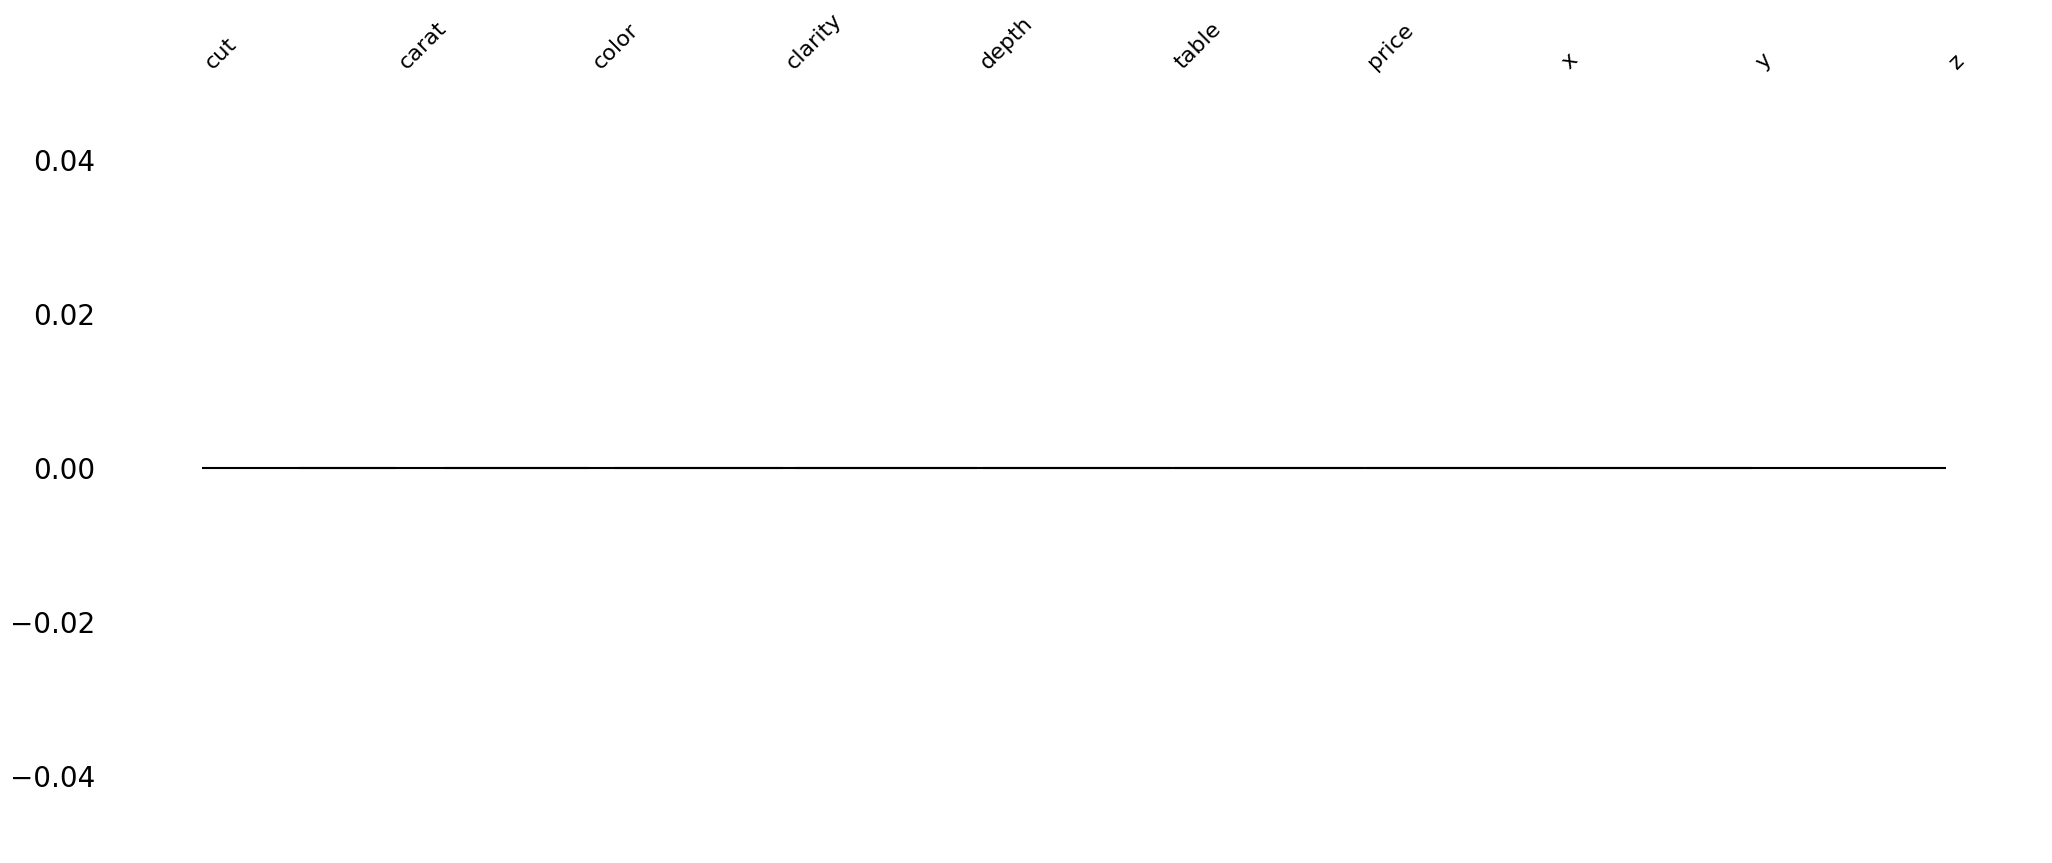

In [75]:
msno.dendrogram(df)

In [72]:
df.select_dtypes(include='number').head()

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.23,56.9,65.0,327,4.05,4.07,2.31
4,0.29,62.4,58.0,334,4.20,4.23,2.63
5,0.31,63.3,58.0,335,4.34,4.35,2.75


In [76]:
df.select_dtypes(include='object').head()

,cut,color,clarity
1,Ideal,E,SI2
2,Premium,E,SI1
3,Good,E,VS1
4,Premium,I,VS2
5,Good,J,SI2


In [ ]:
'''
num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in num_col:
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()
'''

In [77]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

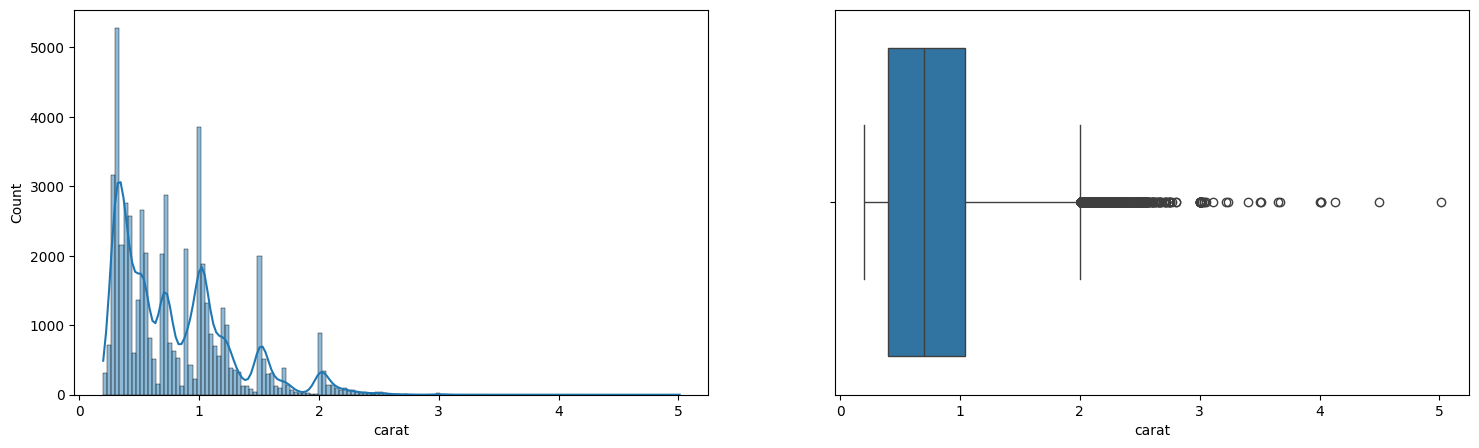

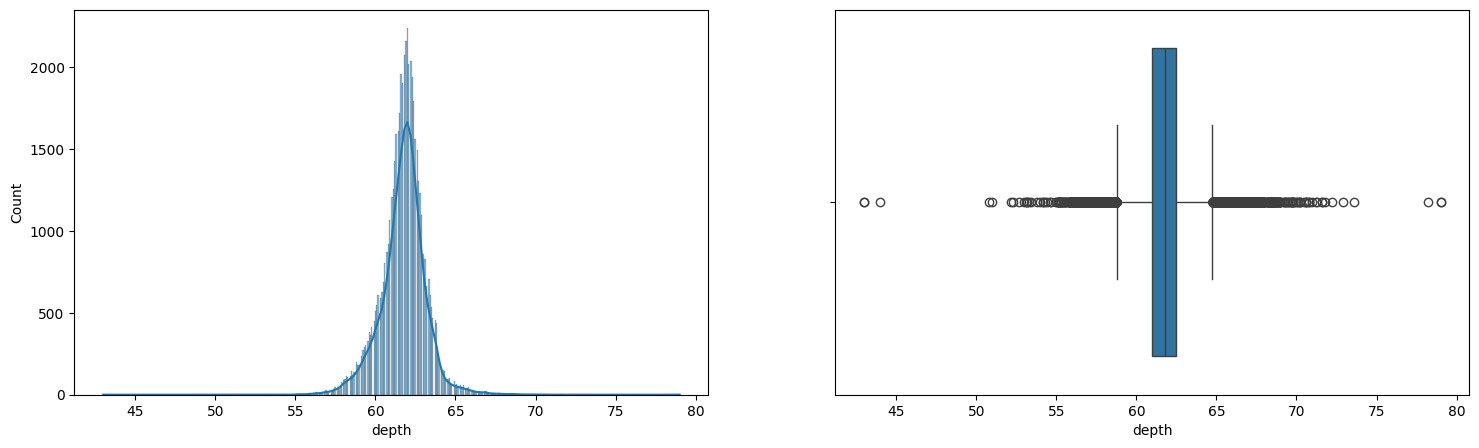

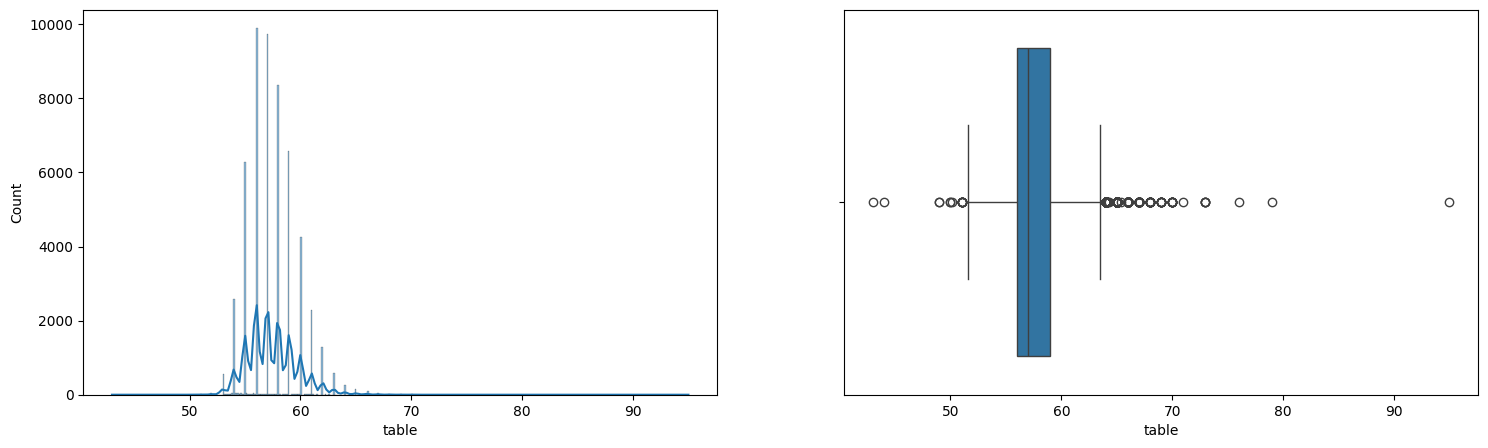

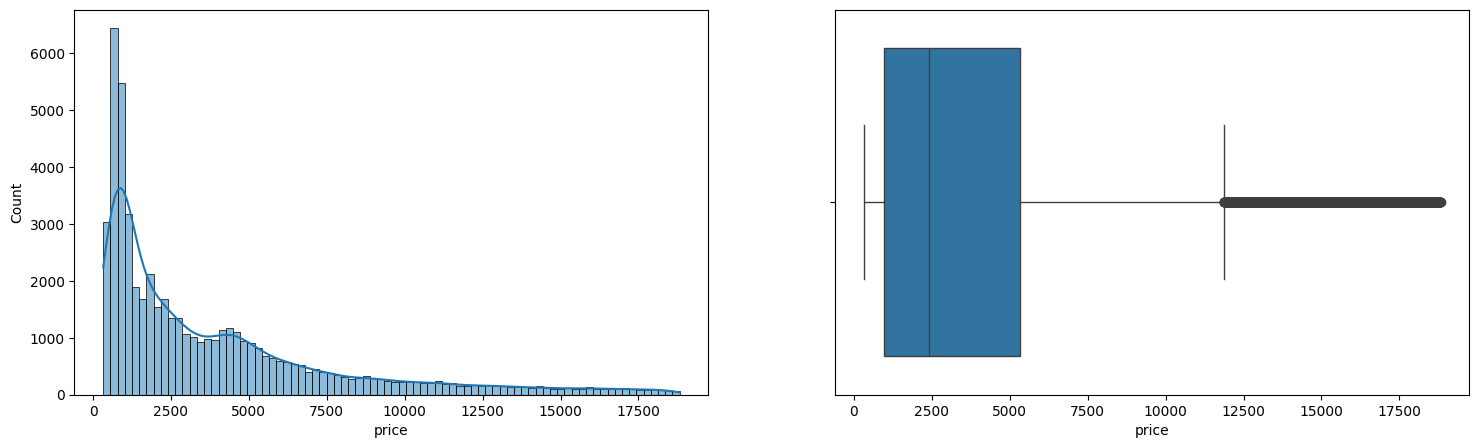

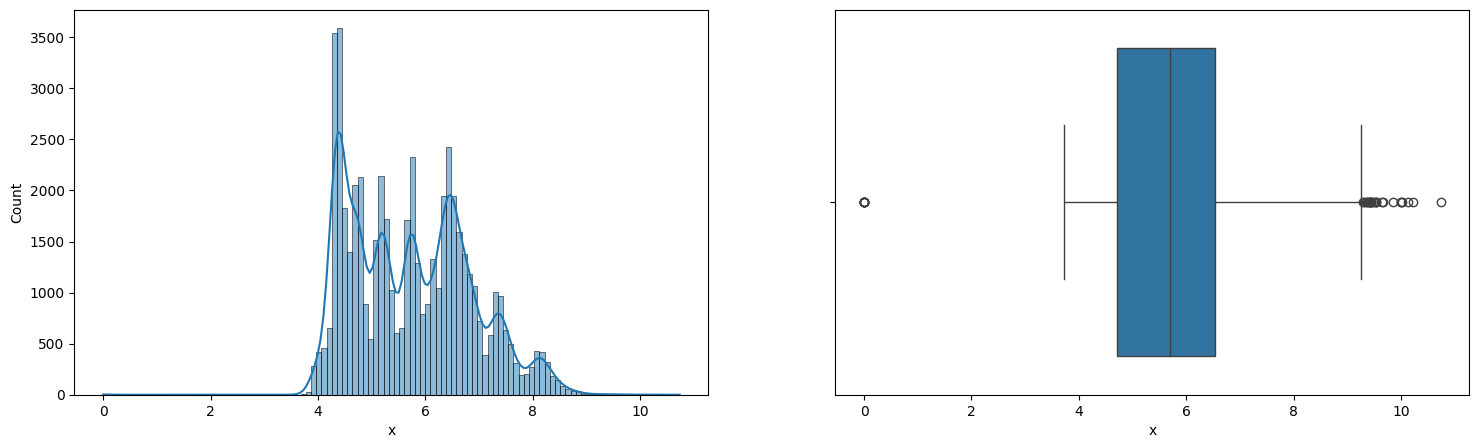

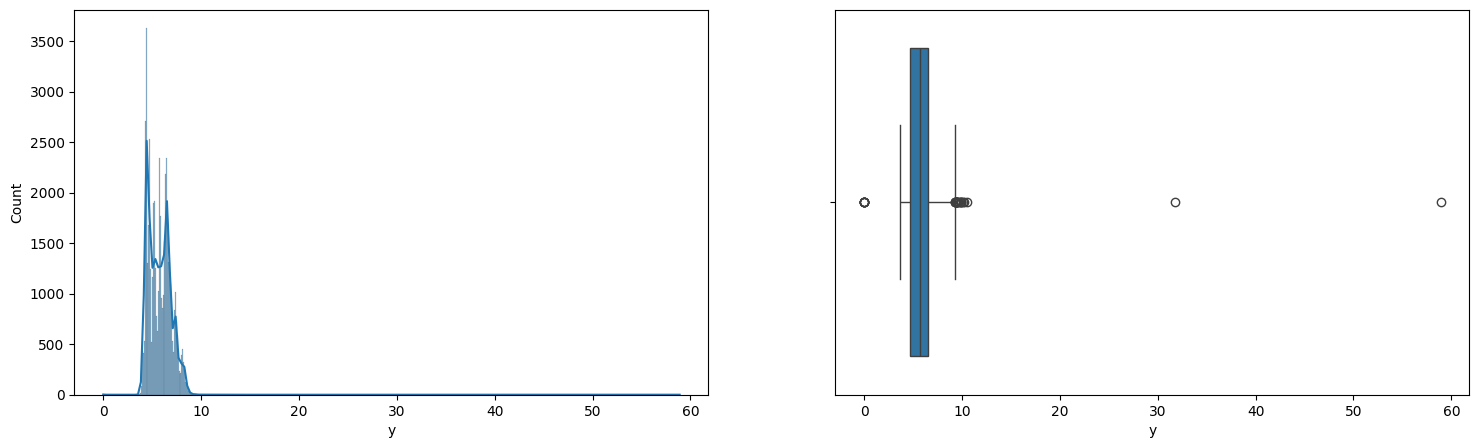

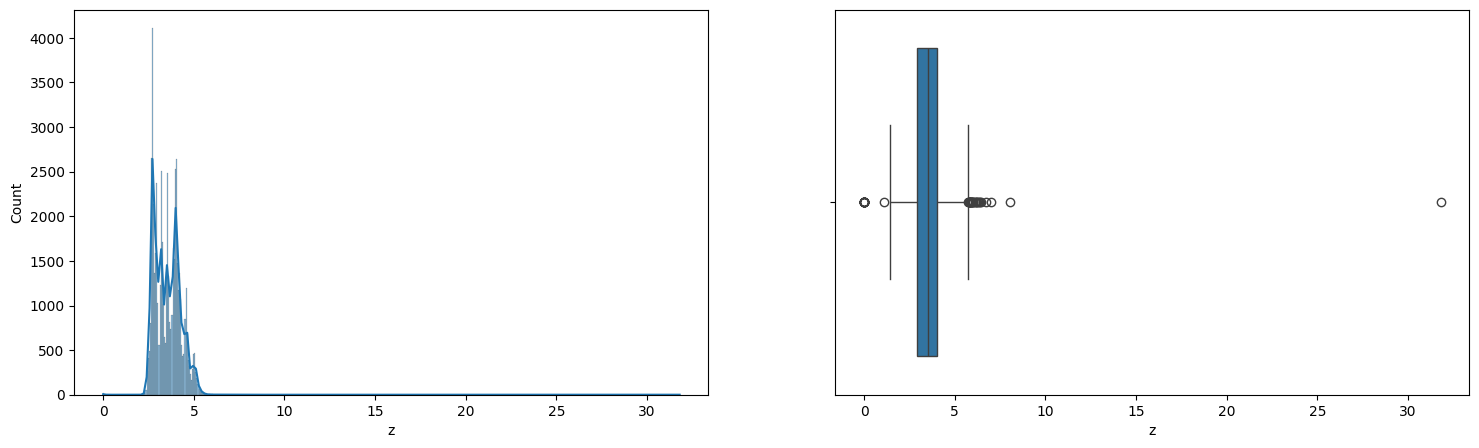

In [78]:
for col in numeric_cols:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    #sns.distplot(df[col])
    sns.histplot(df[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.show()

<Figure size 800x1200 with 0 Axes>

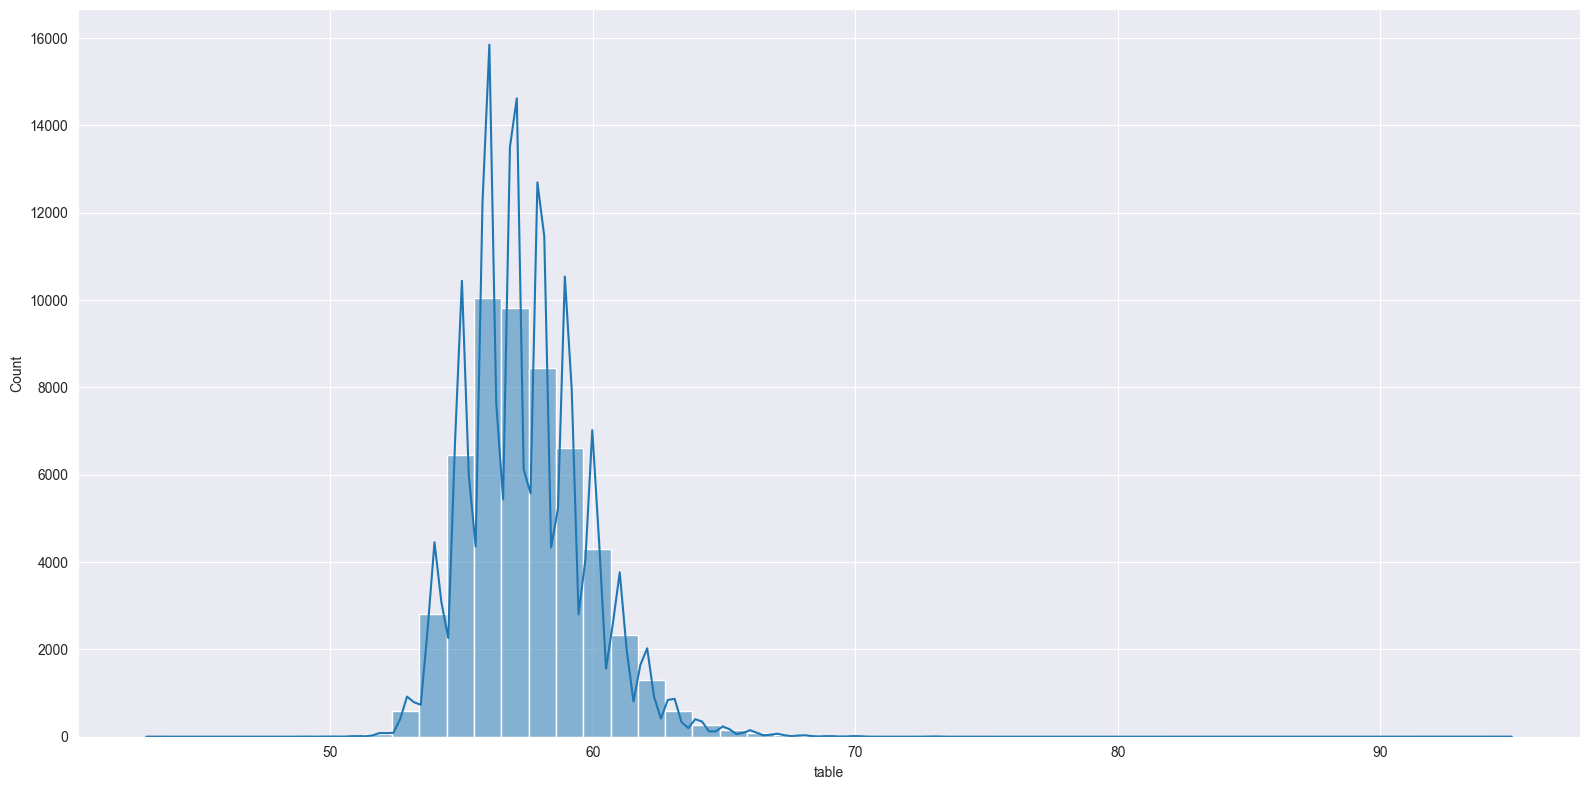

In [79]:
#set the style we wish to use for our plots
sns.set_style("darkgrid")

#plot the distribution of the DataFrame "Price" column
plt.figure(figsize=(8,12))
#sns.histplot(df['price'])
sns.displot(df['table'], kde=True, bins=50, height=8, aspect=2)  

<Axes: xlabel='table'>

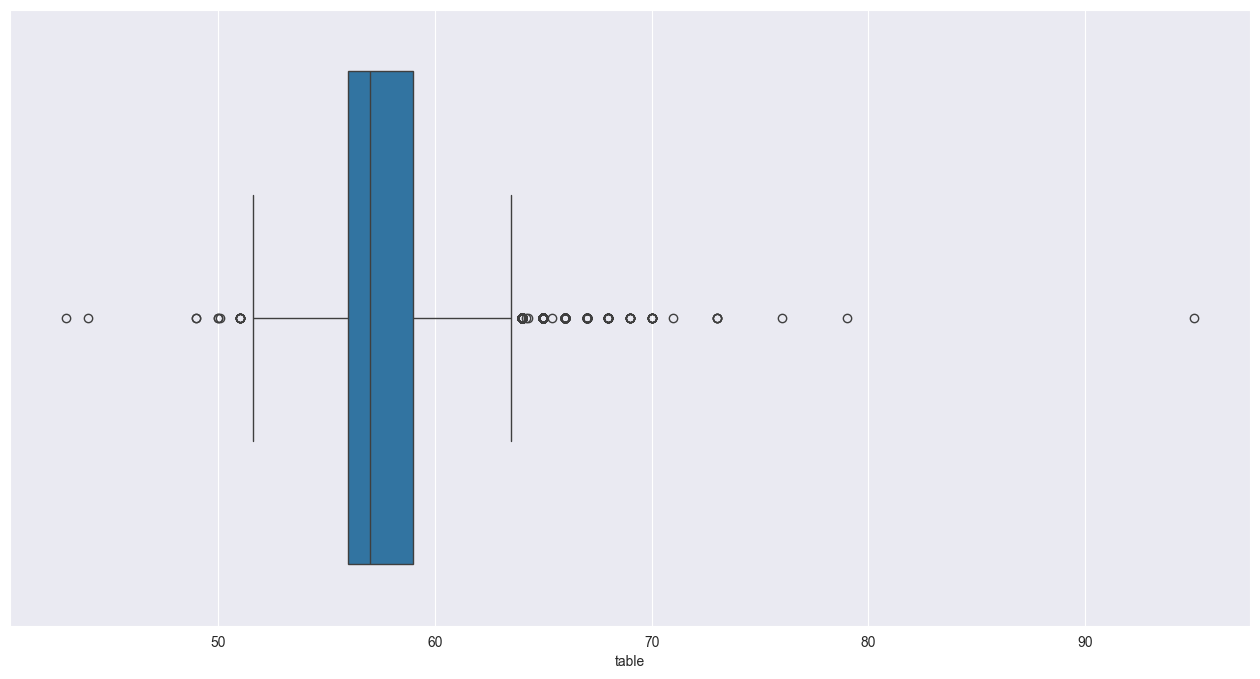

In [80]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="table", data=df, ax=ax)

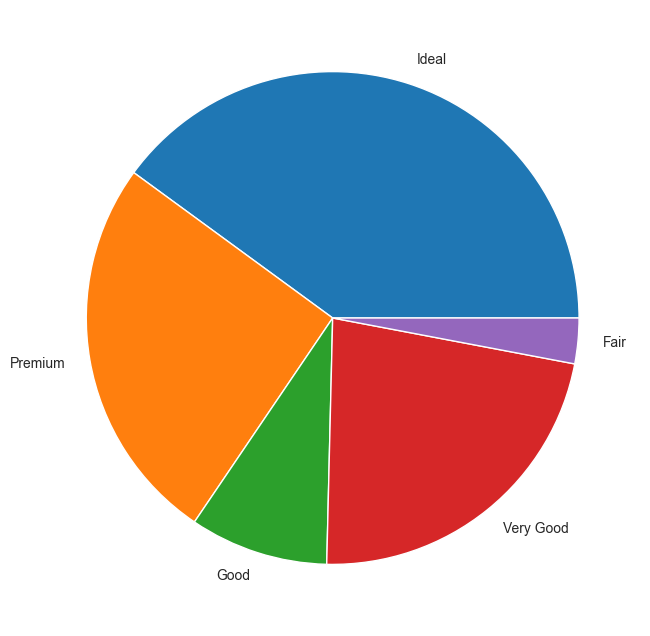

In [81]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(df["cut"].value_counts(sort=False), labels=df["cut"].unique())
plt.show()

<Axes: xlabel='cut'>

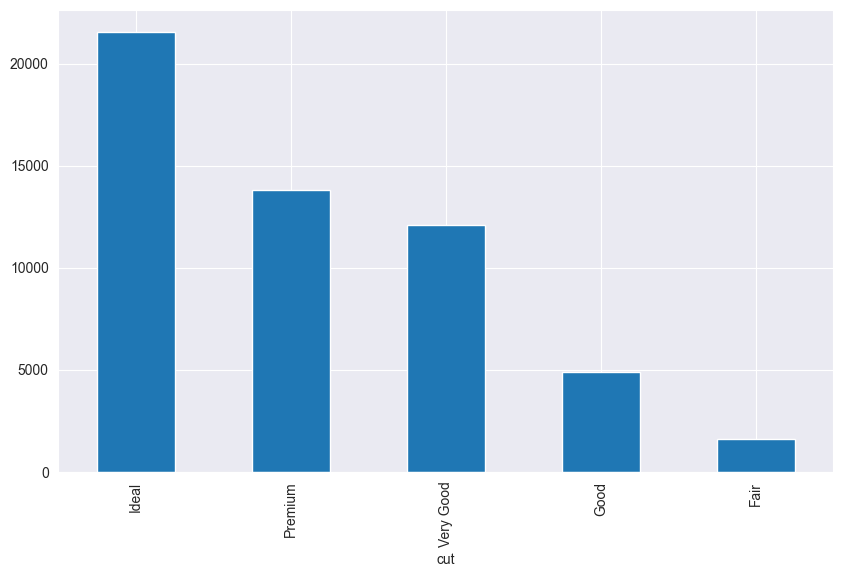

In [82]:
df["cut"].value_counts().plot(kind="bar", figsize=(10,6))

<Axes: xlabel='cut', ylabel='count'>

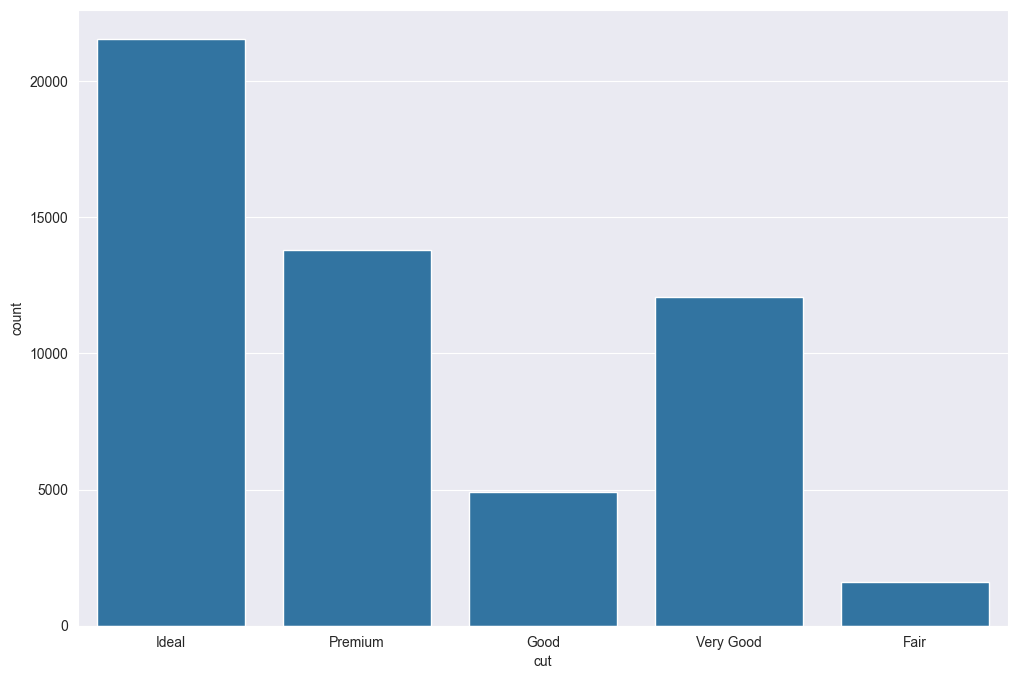

In [83]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(df, x="cut")

<Figure size 1000x1000 with 0 Axes>

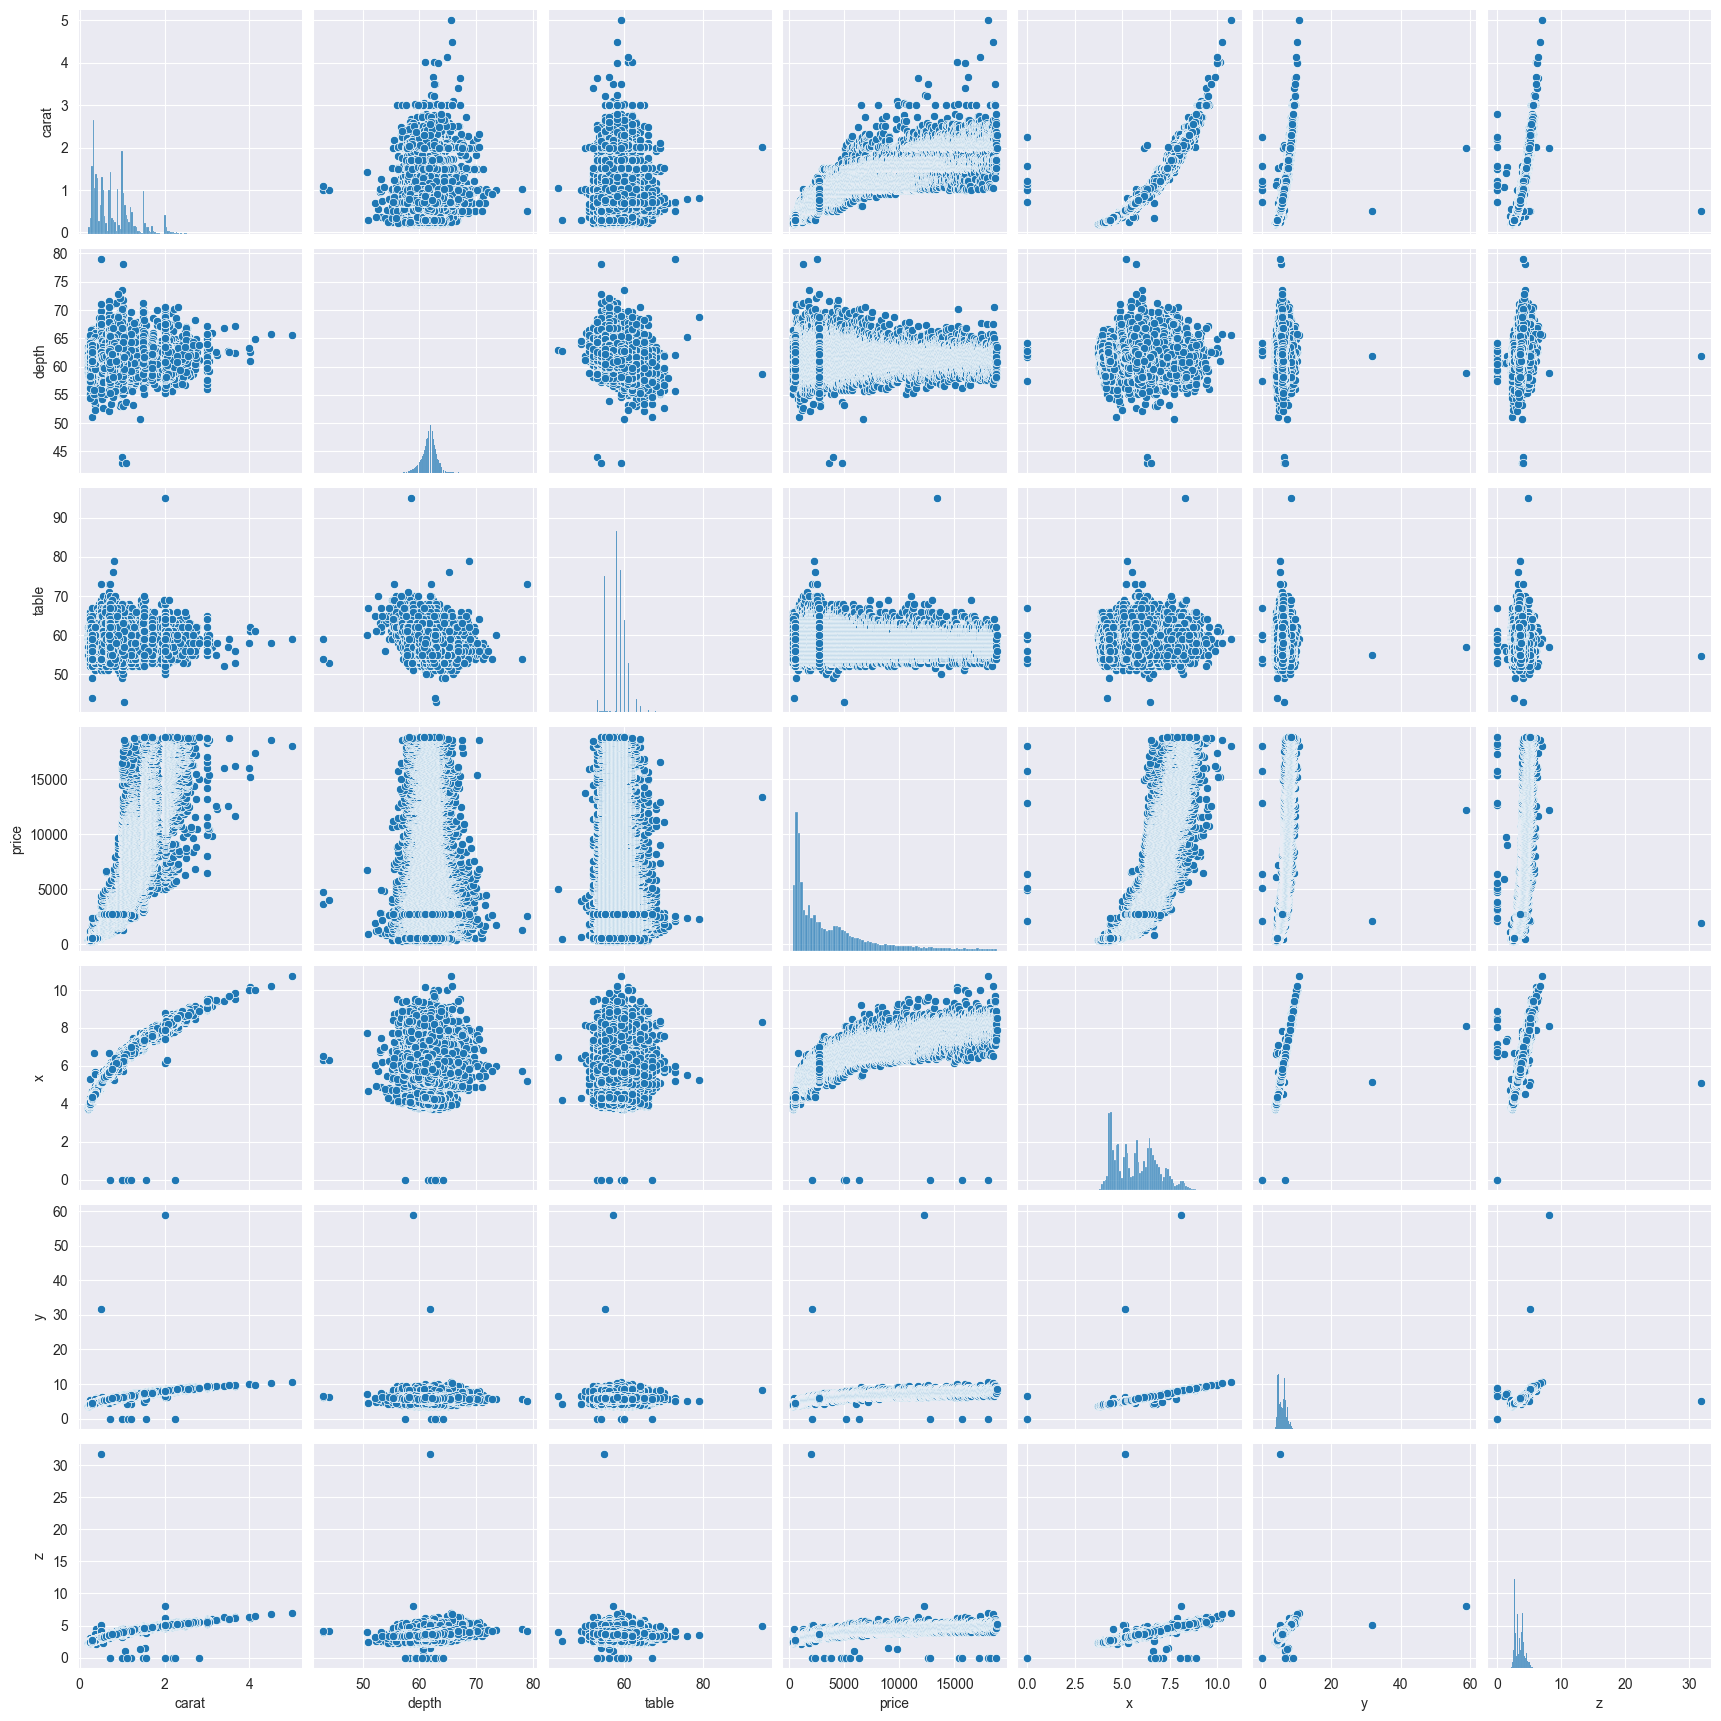

In [84]:
plt.figure(figsize=(10,10))
sns.pairplot(df.select_dtypes(include='number'))

<Axes: xlabel='cut', ylabel='price'>

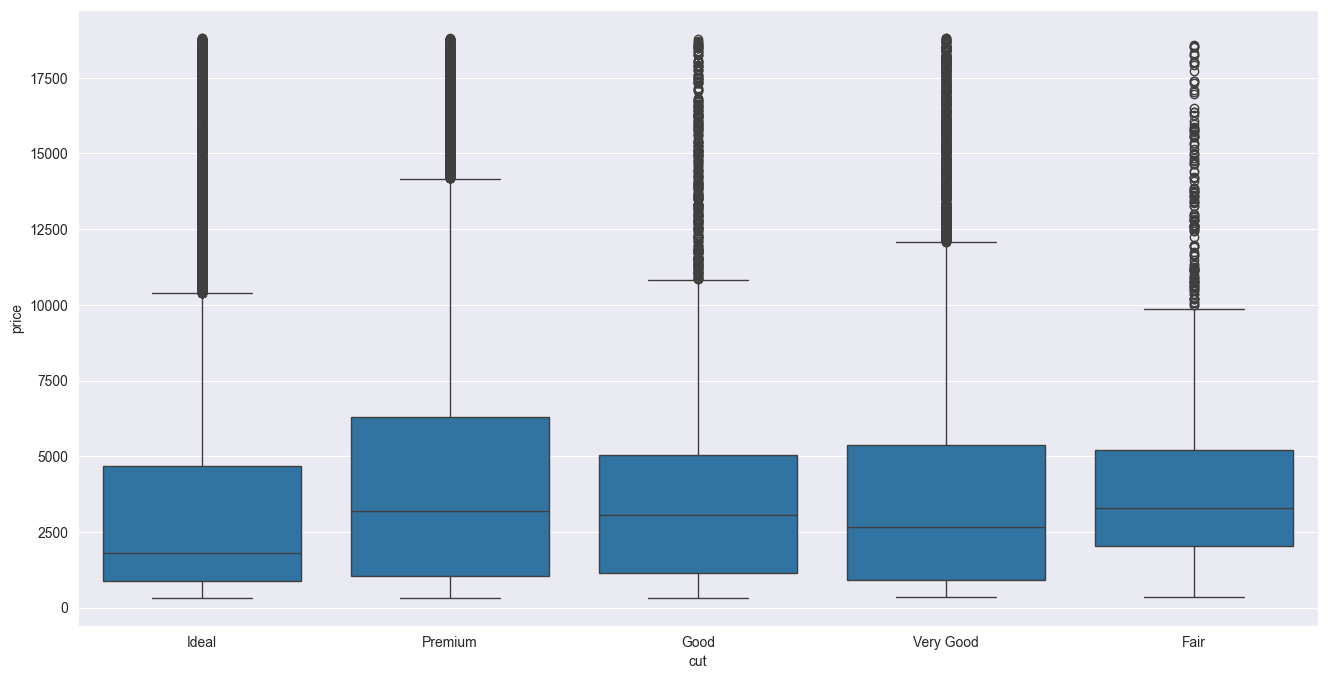

In [87]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="cut", y="price", data=df, ax=ax)

<Axes: xlabel='clarity', ylabel='price'>

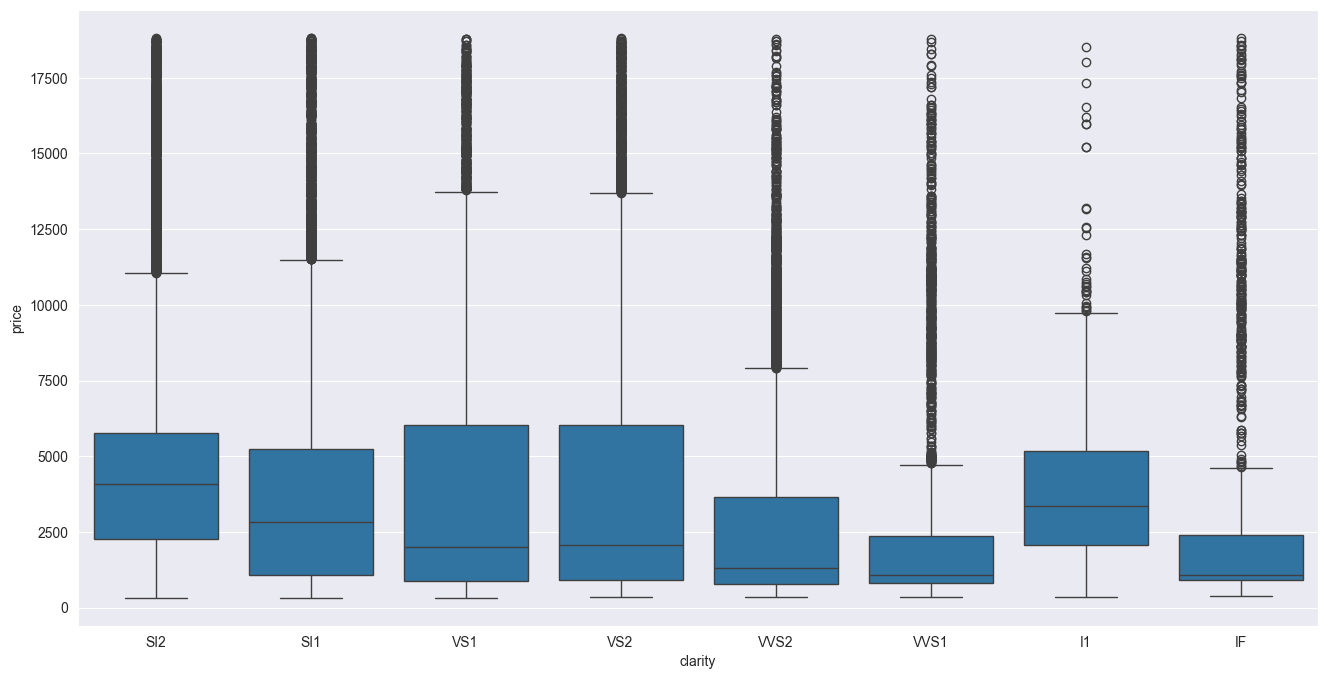

In [88]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="clarity", y="price", data=df, ax=ax)

<Axes: xlabel='color', ylabel='price'>

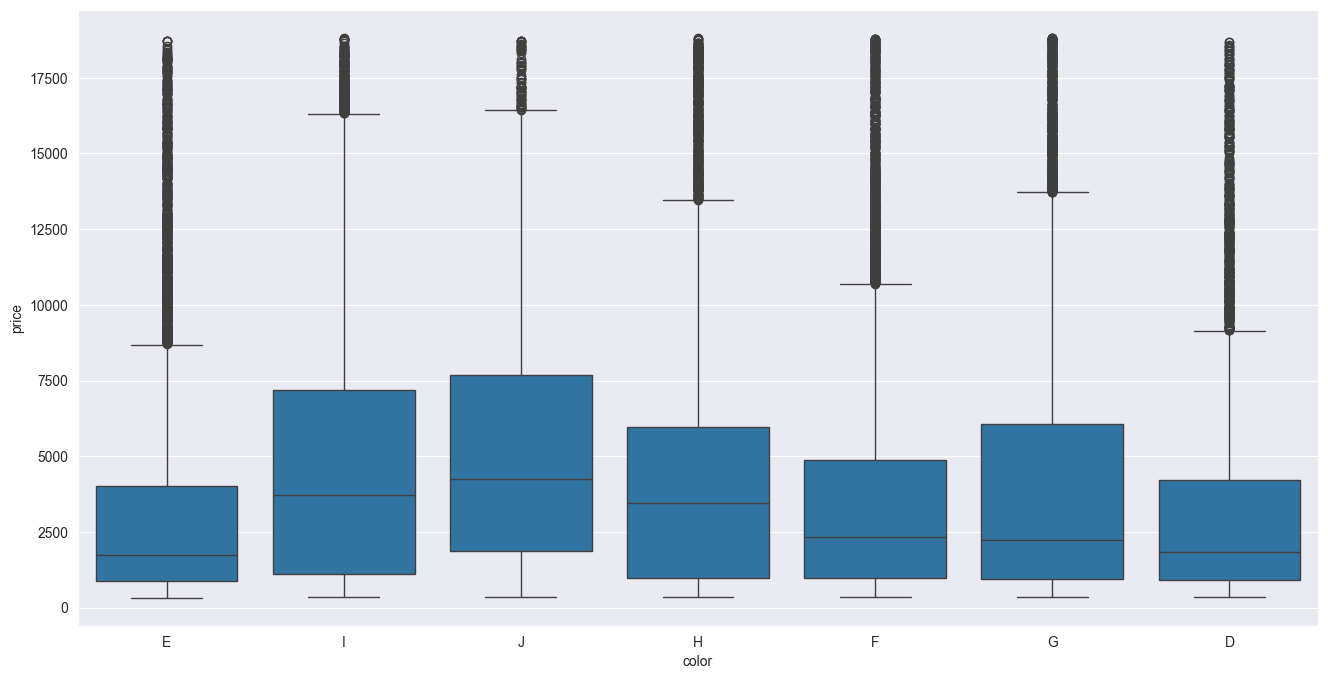

In [89]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="color", y="price", data=df, ax=ax)

Text(30.153163580246897, 0.5, 'Price')

<Figure size 1200x1000 with 0 Axes>

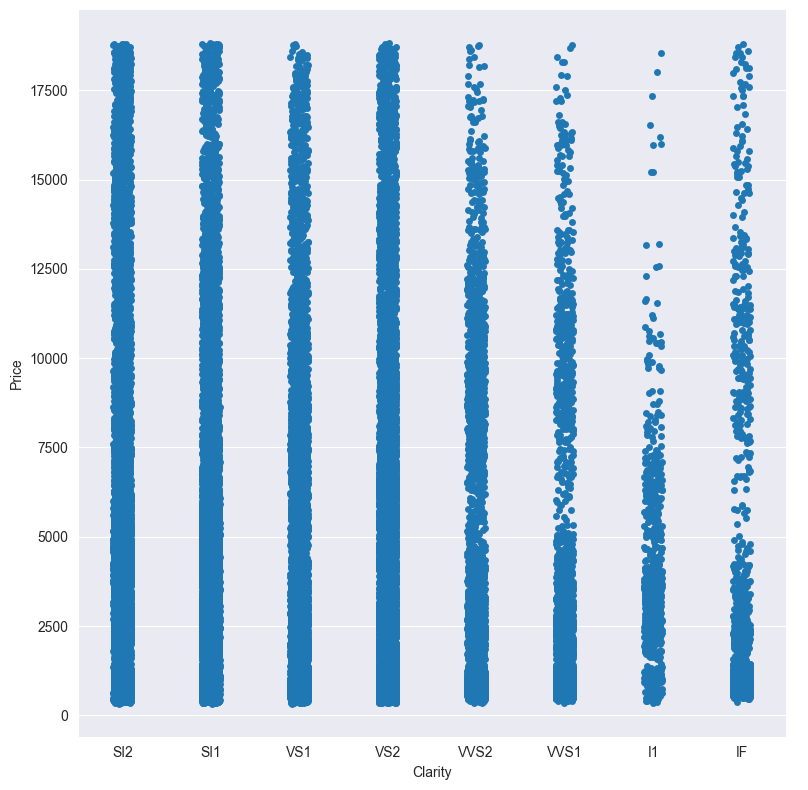

In [100]:
plt.figure(figsize=(12,10))
#https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
sns.catplot(x='clarity',y='price', data=df, height=8)
plt.xlabel('Clarity')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

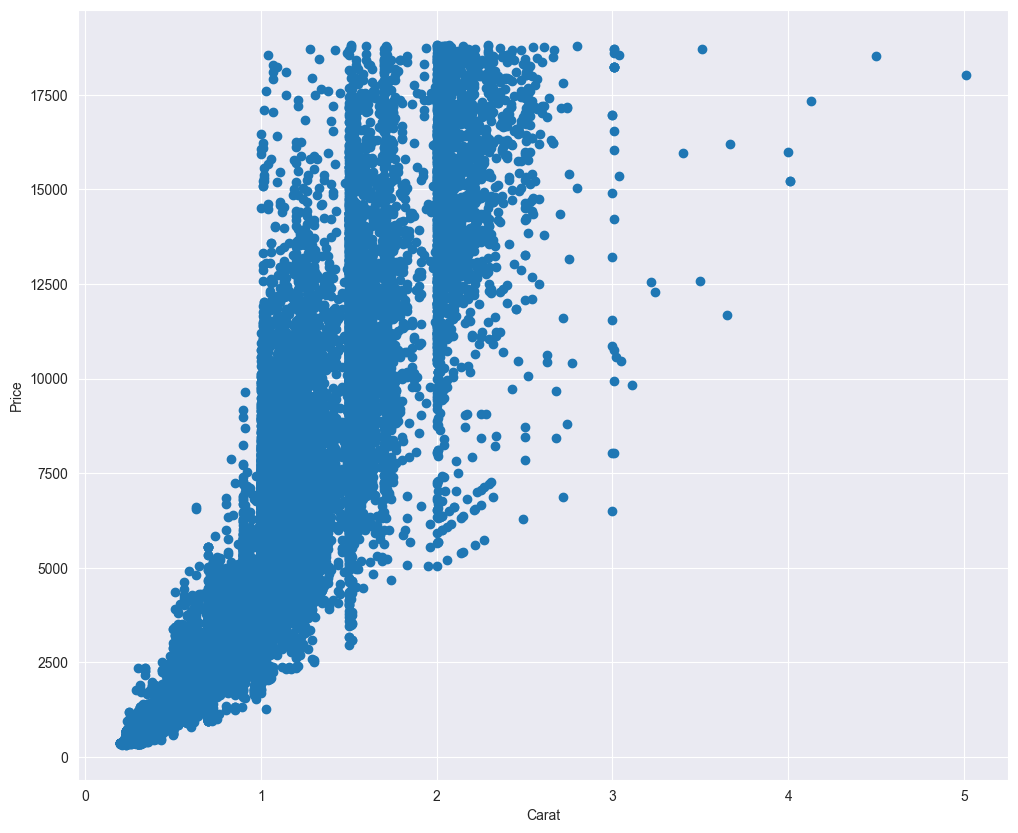

In [101]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='carat',y='price', data=df)
plt.xlabel('Carat')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

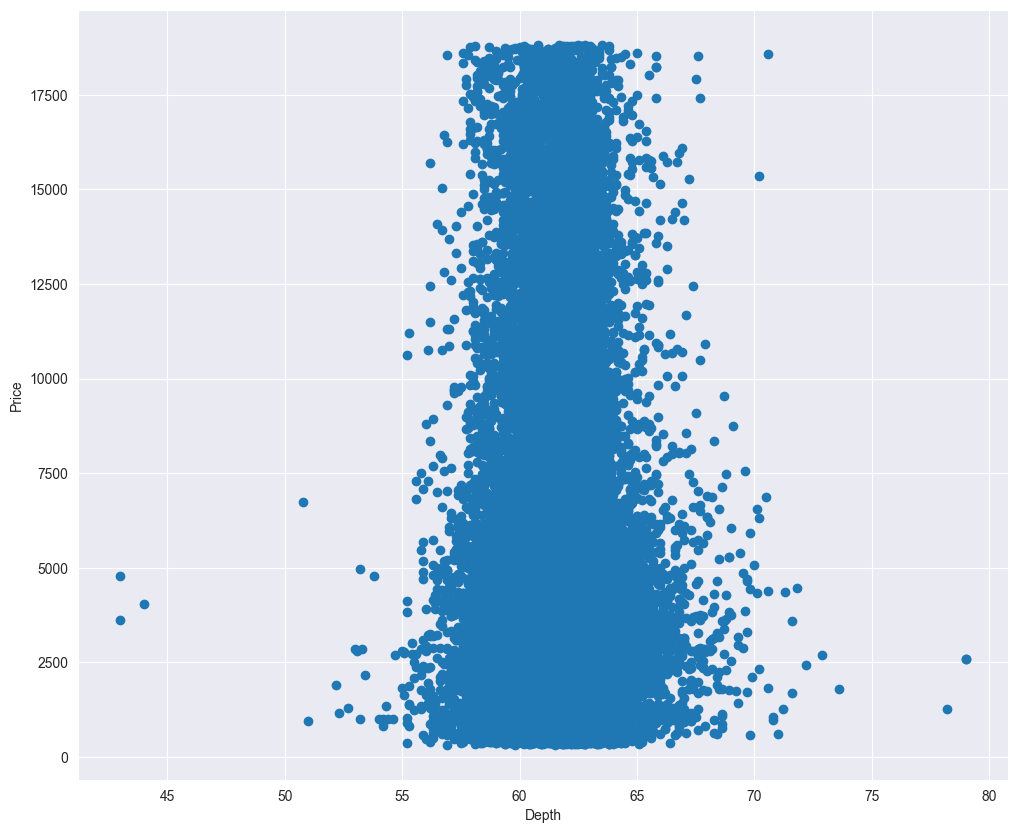

In [94]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='depth',y='price', data=df)
plt.xlabel('Depth')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

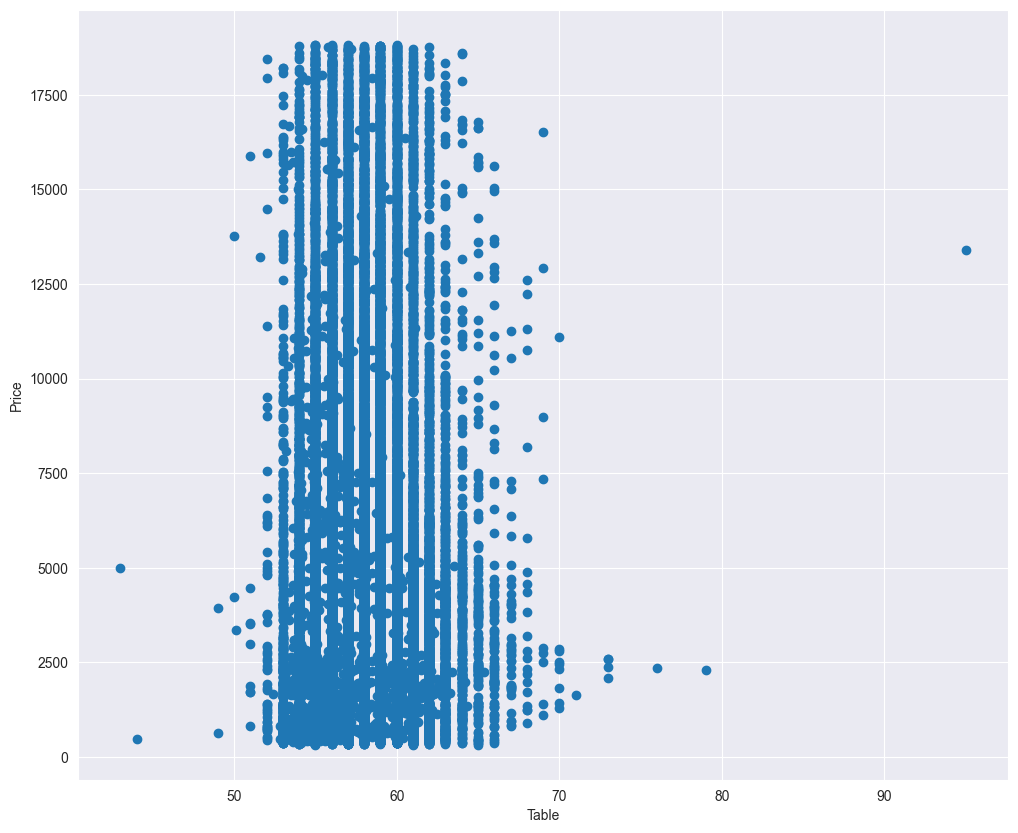

In [95]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='table',y='price', data=df)
plt.xlabel('Table')
plt.ylabel('Price')

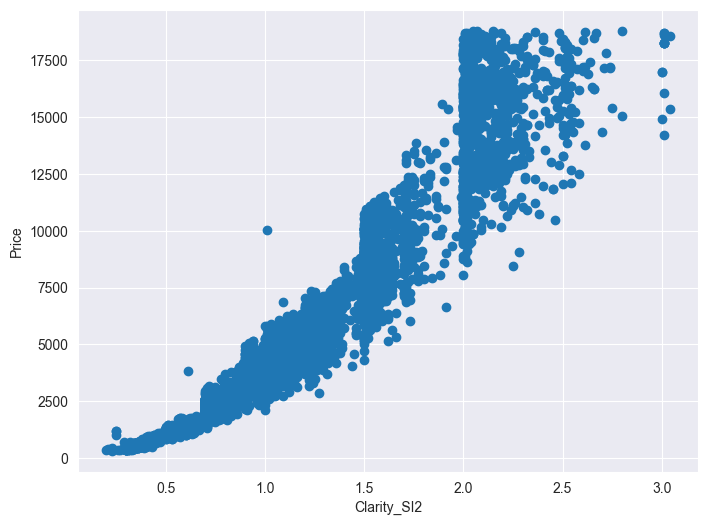

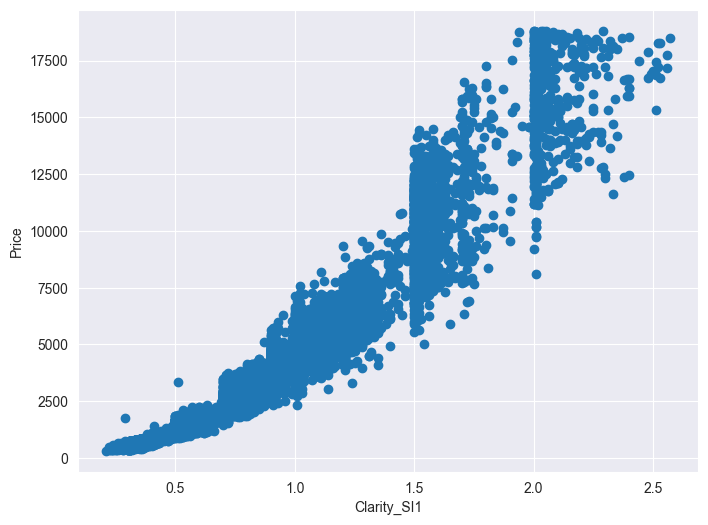

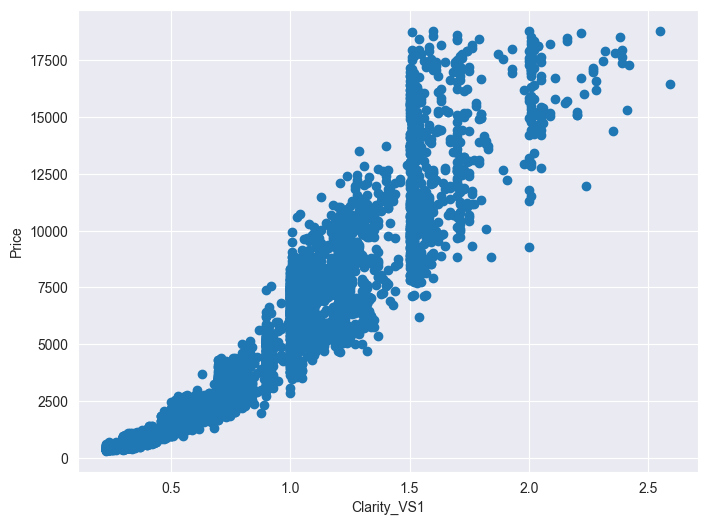

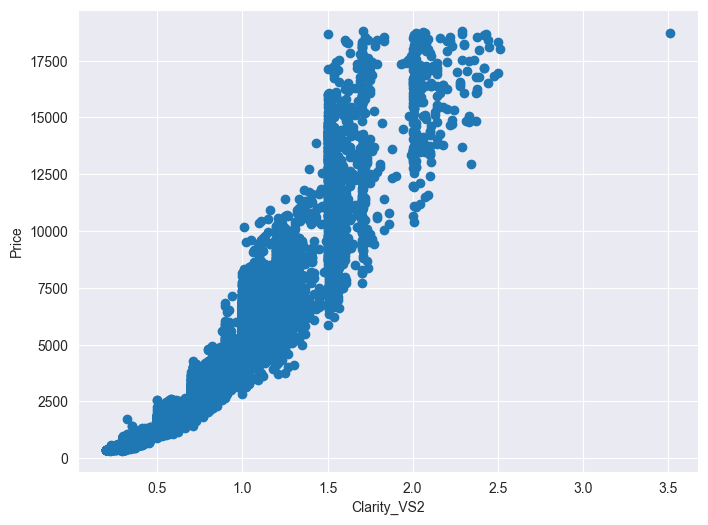

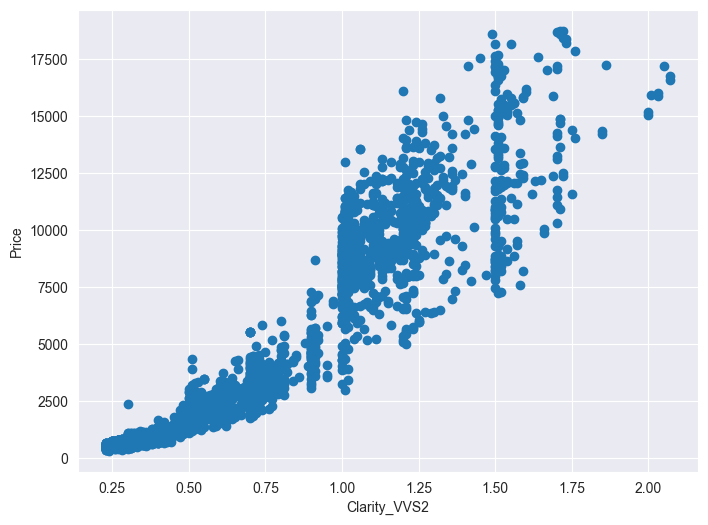

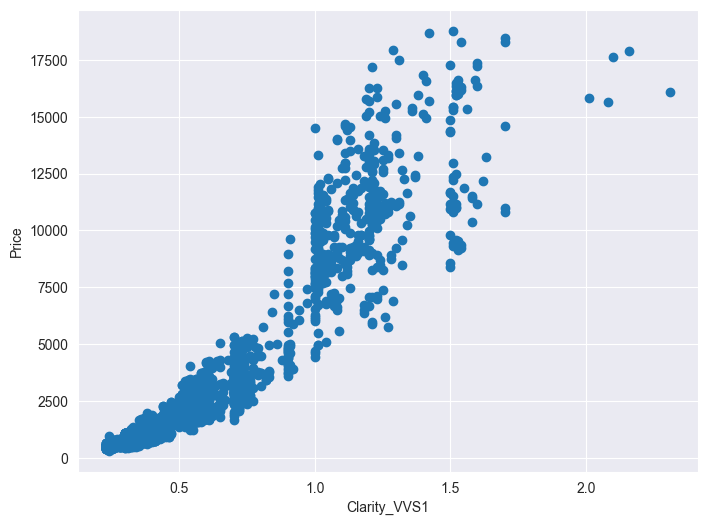

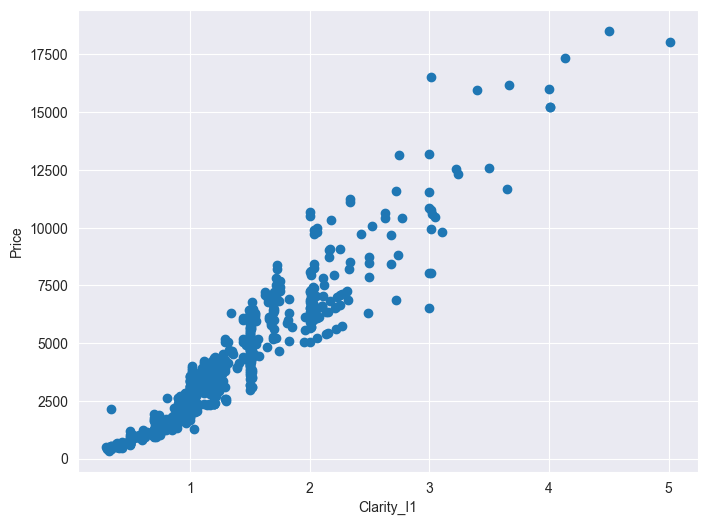

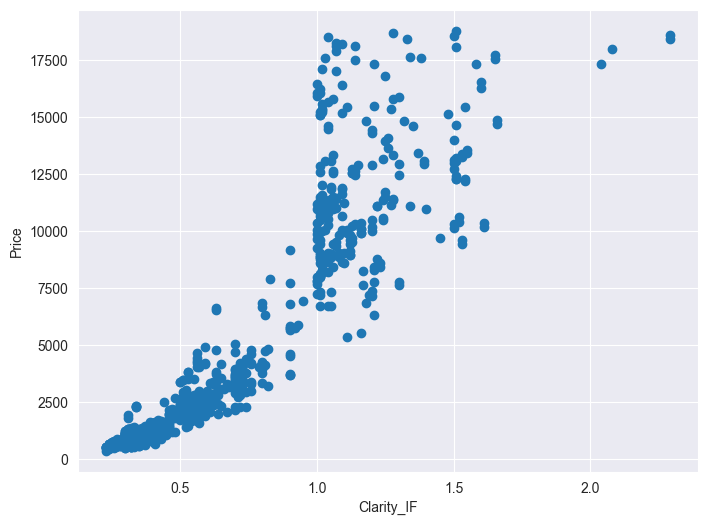

In [110]:
for i in df['clarity'].unique():
    plt.figure(figsize=(8,6))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
    plt.scatter(x='carat',y='price', data=df[df['clarity'] == i])
    plt.xlabel(f'Clarity_{i}')
    plt.ylabel('Price')

In [102]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)